## Setup

In [1]:
import sqlite3, pandas as pd, numpy as np, matplotlib.pyplot as plt

## Create Data

In [2]:
conn = sqlite3.connect("example.db")

conn.execute('''
CREATE TABLE IF NOT EXISTS name_table(StudentID TEXT PRIMARY KEY, Name TEXT);''')

conn.commit()

In [3]:
conn = sqlite3.connect("example.db")

conn.execute("INSERT INTO name_table VALUES('V001', 'Abe');")
conn.execute("INSERT INTO name_table VALUES('V002', 'Abhay');")
conn.execute("INSERT INTO name_table VALUES('V003', 'Acelin');")
conn.execute("INSERT INTO name_table VALUES('V004', 'Adelphos');")

conn.commit()

In [4]:
for i in conn.execute('''Select * From name_table'''):
  print(i)

('V001', 'Abe')
('V002', 'Abhay')
('V003', 'Acelin')
('V004', 'Adelphos')


In [5]:
conn.execute('''
CREATE TABLE IF NOT EXISTS mark_table(StudentID TEXT PRIMARY KEY, Total_marks INTEGER);''')

conn.commit()

In [6]:
conn.execute("INSERT INTO mark_table VALUES('V001', 95);")
conn.execute("INSERT INTO mark_table VALUES('V002', 80);")
conn.execute("INSERT INTO mark_table VALUES('V003', 74);")
conn.execute("INSERT INTO mark_table VALUES('V004', 81);")

conn.commit()

In [7]:
for i in conn.execute('''Select * From mark_table'''):
  print(i)

('V001', 95)
('V002', 80)
('V003', 74)
('V004', 81)


## Section 1

### Q1

In [8]:
query = '''Select nt.StudentID, nt.Name From name_table nt
      Where nt.StudentID IN 
      (Select mt.StudentID From Mark_table mt
      Where mt.Total_marks > (Select Total_marks From Mark_table Where StudentID == 'V002'));'''

for e in conn.execute(query):
  print(e)

('V001', 'Abe')
('V004', 'Adelphos')


### Q2

In [9]:
name_table = pd.read_sql_query("Select * From name_table", conn)

In [10]:
name_table.head()

,StudentID,Name
0,V001,Abe
1,V002,Abhay
2,V003,Acelin
3,V004,Adelphos


In [11]:
mark_table = pd.read_sql_query("Select * From mark_table", conn)

In [12]:
mark_table

,StudentID,Total_marks
0,V001,95
1,V002,80
2,V003,74
3,V004,81


In [13]:
def chnage_letter_case(df, col_name):
  df[col_name] = df[col_name].apply(lambda x: x.upper() if ("e" in x) or ("E" in x) else x.lower())

  return df

In [14]:
chnage_letter_case(name_table.copy(), "Name")

,StudentID,Name
0,V001,ABE
1,V002,abhay
2,V003,ACELIN
3,V004,ADELPHOS


### Q3

In [15]:
def avg_by_case(df1, df2, col_name1, col_name2):
  df1 = chnage_letter_case(df1, col_name1)
  df1["upper_case"] = df1[col_name1].str.isupper()
  new_df = pd.merge(df1, df2, on=col_name2)
  print(new_df)
  
  return new_df.groupby("upper_case").mean()

In [16]:
avg_by_case(name_table.copy(), mark_table.copy(), "Name", "StudentID")

  StudentID      Name  upper_case  Total_marks
0      V001       ABE        True           95
1      V002     abhay       False           80
2      V003    ACELIN        True           74
3      V004  ADELPHOS        True           81


,Total_marks
upper_case,
False,80.000000
True,83.333333


## Section 2

### Q1

In [17]:
!curl https://raw.githubusercontent.com/helloworlddata/white-house-salaries/master/data/converted/2017.csv > 2017.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36974  100 36974    0     0  85390      0 --:--:-- --:--:-- --:--:-- 85390


In [18]:
whitehouse_salary = pd.read_csv("2017.csv")
whitehouse_salary.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


In [19]:
whitehouse_salary.describe() # use pandas describe to summarize the dataset

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
count,377,377,377,377,375
unique,377,2,74,3,214
top,"Luna, Nicholas F.",Employee,"$115,000.00",Per Annum,EXECUTIVE ASSISTANT
freq,1,359,46,375,20


#### Check null and Impute null 

In [20]:
whitehouse_salary.isna().sum() # check null values if there are too many, I choose to drop them

NAME              0
STATUS            0
SALARY            0
PAY BASIS         0
POSITION TITLE    2
dtype: int64

In [21]:
whitehouse_salary[whitehouse_salary["POSITION TITLE"].isna()]

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
250,"Mullen, Courtney E.",Employee,"$94,000.00",Per Annum SPECIAL ASSISTANT,NaN
350,"Trainor, Gregory T.",Employee,"$76,685.00",Per Annum DIRECTOR OF SPECIAL PROJECTS FOR COR...,NaN


In [22]:
position = whitehouse_salary.iloc[[250,350]]["PAY BASIS"].str.slice(len("Per Annum"))

In [23]:
position

250                                   SPECIAL ASSISTANT
350     DIRECTOR OF SPECIAL PROJECTS FOR CORRESPONDENCE
Name: PAY BASIS, dtype: object

In [24]:
whitehouse_salary.loc[[250,350],"PAY BASIS"] = "Per Annum"
whitehouse_salary.loc[[250,350],"POSITION TITLE"] = position

In [25]:
whitehouse_salary.iloc[[250,350],:]

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
250,"Mullen, Courtney E.",Employee,"$94,000.00",Per Annum,SPECIAL ASSISTANT
350,"Trainor, Gregory T.",Employee,"$76,685.00",Per Annum,DIRECTOR OF SPECIAL PROJECTS FOR CORRESPONDENCE


In [26]:
whitehouse_salary.describe() # chack the data

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
count,377,377,377,377,377
unique,377,2,74,1,216
top,"Luna, Nicholas F.",Employee,"$115,000.00",Per Annum,EXECUTIVE ASSISTANT
freq,1,359,46,377,20


#### Convert salary entries to numerical values 

In [27]:
whitehouse_salary["SALARY"] = whitehouse_salary["SALARY"].replace("[\$,]", "", regex = True).astype(float)

In [28]:
whitehouse_salary["SALARY"].head()

0     56000.0
1     95000.0
2    140000.0
3     94000.0
4     77000.0
Name: SALARY, dtype: float64

#### standardize salary and log transform salary

In [29]:
whitehouse_salary["STD_SALARY"] = (whitehouse_salary["SALARY"] - whitehouse_salary["SALARY"].mean())/whitehouse_salary["SALARY"].std()
whitehouse_salary["LOG_SALARY"] = np.log(whitehouse_salary["SALARY"]+1)

In [30]:
whitehouse_salary.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE,STD_SALARY,LOG_SALARY
0,"Alexander, Monica K.",Employee,56000.0,Per Annum,EXECUTIVE ASSISTANT,-0.901644,10.933125
1,"Ambrosini, Michael J.",Employee,95000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,0.002969,11.461643
2,"Amin, Stacy C.",Employee,140000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,1.046753,11.849405
3,"Andersen, Whitney N.",Employee,94000.0,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,-0.020226,11.451061
4,"Anderson, Alexander J.",Employee,77000.0,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,-0.414545,11.251574


#### Add position title frequency and position title average salary

In [31]:
whitehouse_salary["POTITION TITLE FREQ"] = whitehouse_salary["POSITION TITLE"].map(whitehouse_salary["POSITION TITLE"].value_counts())

In [32]:
whitehouse_salary["POTITION TITLE AVG SALARY"] = whitehouse_salary["POSITION TITLE"].map(whitehouse_salary.groupby("POSITION TITLE")["SALARY"].mean())

In [33]:
whitehouse_salary.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE,STD_SALARY,LOG_SALARY,POTITION TITLE FREQ,POTITION TITLE AVG SALARY
0,"Alexander, Monica K.",Employee,56000.0,Per Annum,EXECUTIVE ASSISTANT,-0.901644,10.933125,20,57800.0
1,"Ambrosini, Michael J.",Employee,95000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,0.002969,11.461643,1,95000.0
2,"Amin, Stacy C.",Employee,140000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,1.046753,11.849405,4,135000.0
3,"Andersen, Whitney N.",Employee,94000.0,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,-0.020226,11.451061,1,94000.0
4,"Anderson, Alexander J.",Employee,77000.0,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,-0.414545,11.251574,1,77000.0


### Q2

In [34]:
!curl https://raw.githubusercontent.com/fractalbass/data_engineer/master/data.csv > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  229k  100  229k    0     0  74193      0  0:00:03  0:00:03 --:--:-- 74217


In [35]:
temp_data = pd.read_csv("data.csv", sep = ",", names = ["ID", "val"], header = None)

In [36]:
temp_data.head()

,ID,val
0,0,23.827290
1,1,23.589108
2,2,24.529556
3,3,16.684580
4,4,22.075507


In [37]:
temp_data["val"].describe()

count    10000.000000
mean        23.036075
std          2.995296
min         11.248686
25%         21.007801
50%         23.024042
75%         25.069083
max         33.286533
Name: val, dtype: float64

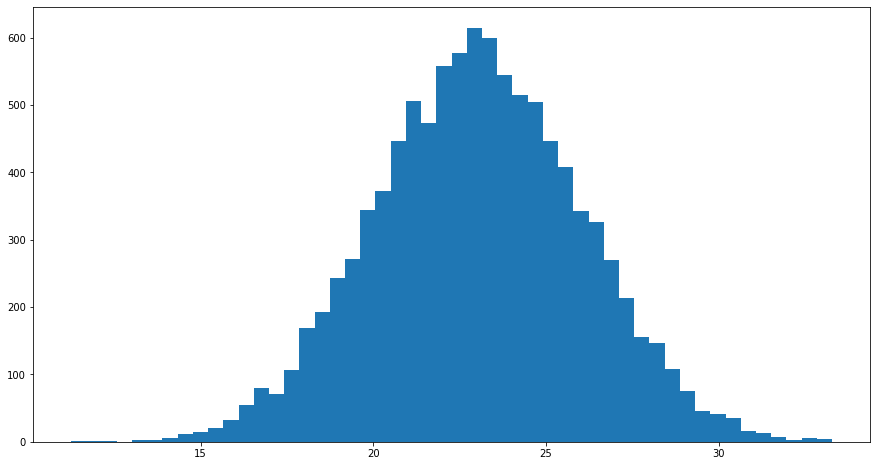

In [38]:
plt.figure(figsize = (15, 8))
plt.hist(temp_data["val"].values, bins = 50)
plt.show()

The data is normally distributed with mean 23 and std 2.99.

## Section 3

Pandas fillna method is the only way I know to impute null values and it is fast.



## Section 4

Python has a library called threading and it has a function called Timer that allows people to write a script for this purpose. 



## Section 5

The math professors at Oregon State University are my favorite Mathematicians. They have a great impact on my life.
1.   Prof. Ossiander, my undergraduate advisor and Probability professor, and Prof. Peszynska, who taught me Advanced Calculus, helped me be a better problem solver. They both assigned tremendous difficult problems each week. After surviving their classes, I believe practics make things perfect.
2.   Prof. Fardani, my MS thesis advisor and Numerical Analysis professor, sparked my interest in Applied Mathematics. He always had good and interesting Matlab simulations to explain complex subjects. Recently, he wrote a simple Matlab program to illustrate how Covid-19 spread.

